In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch.nn.functional as F

In [2]:
def load_image(img_path, dims=128):
    image = Image.open(img_path)
    smallest_side = min(image.size)
    image = image.crop(((
        (image.size[0] - smallest_side) / 2,
        (image.size[1] - smallest_side) / 2,
        (image.size[0] + smallest_side) / 2,
        (image.size[1] + smallest_side) / 2,
    )))
    image = image.resize((dims, dims))
    image = np.array(image.convert("RGB"))
    image = image[None].transpose(0, 3, 1, 2)[0]
    image = torch.from_numpy(image) / 127.5 - 1.0
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


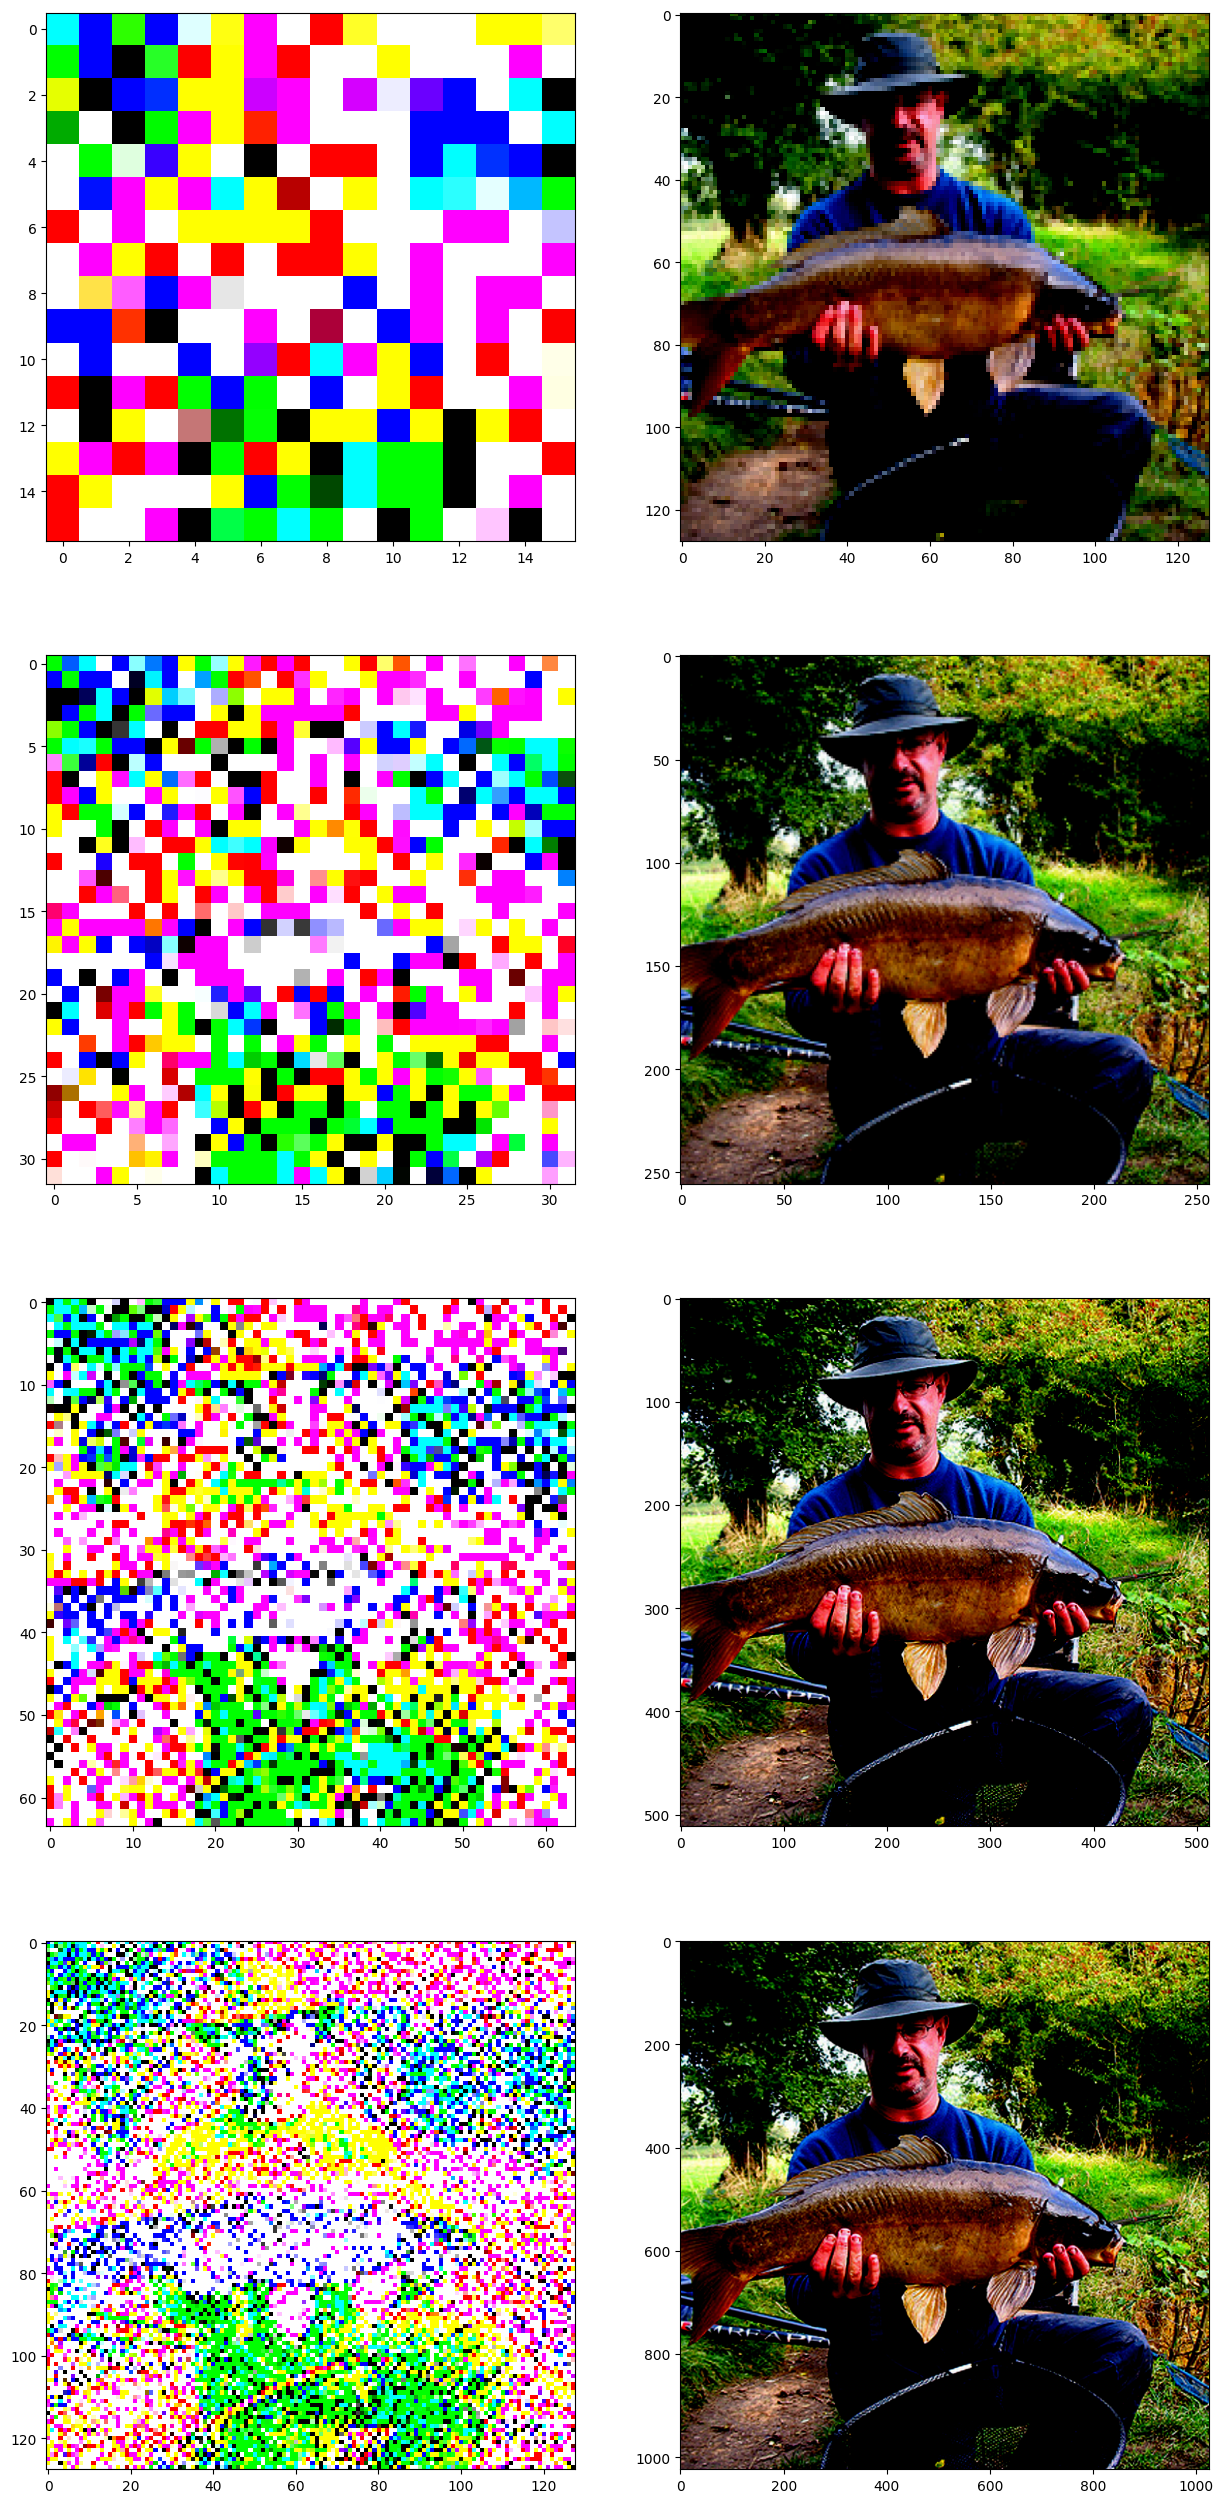

In [4]:
latent128 = torch.load("imagenet_0_latent_diffusers.pt").cpu().to(dtype=torch.float32)
image128 = load_image("datasets/imagenet/train/n01440764/n01440764_18.JPEG", 128)
latent256 = torch.load("imagenet_0_latent_diffusers256.pt").cpu().to(dtype=torch.float32)
image256 = load_image("datasets/imagenet/train/n01440764/n01440764_18.JPEG", 256)
latent512 = torch.load("imagenet_0_latent_diffusers512.pt").cpu().to(dtype=torch.float32)
image512 = load_image("datasets/imagenet/train/n01440764/n01440764_18.JPEG", 512)
latent1024 = torch.load("imagenet_0_latent_diffusers2.pt").cpu().to(dtype=torch.float32)
image1024 = load_image("datasets/imagenet/train/n01440764/n01440764_18.JPEG", 1024)
latents = [latent128, latent256, latent512, latent1024]
images = [image128, image256, image512, image1024]

fig = plt.figure(figsize = (15,32))

for r in range(len(latents)):
    ax1 = fig.add_subplot(len(latents), 2, (r*2)+1)
    plt.imshow(latents[r][0].permute(1, 2, 0))
    ax2 = fig.add_subplot(len(latents), 2, (r*2)+2)
    plt.imshow(images[r].permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


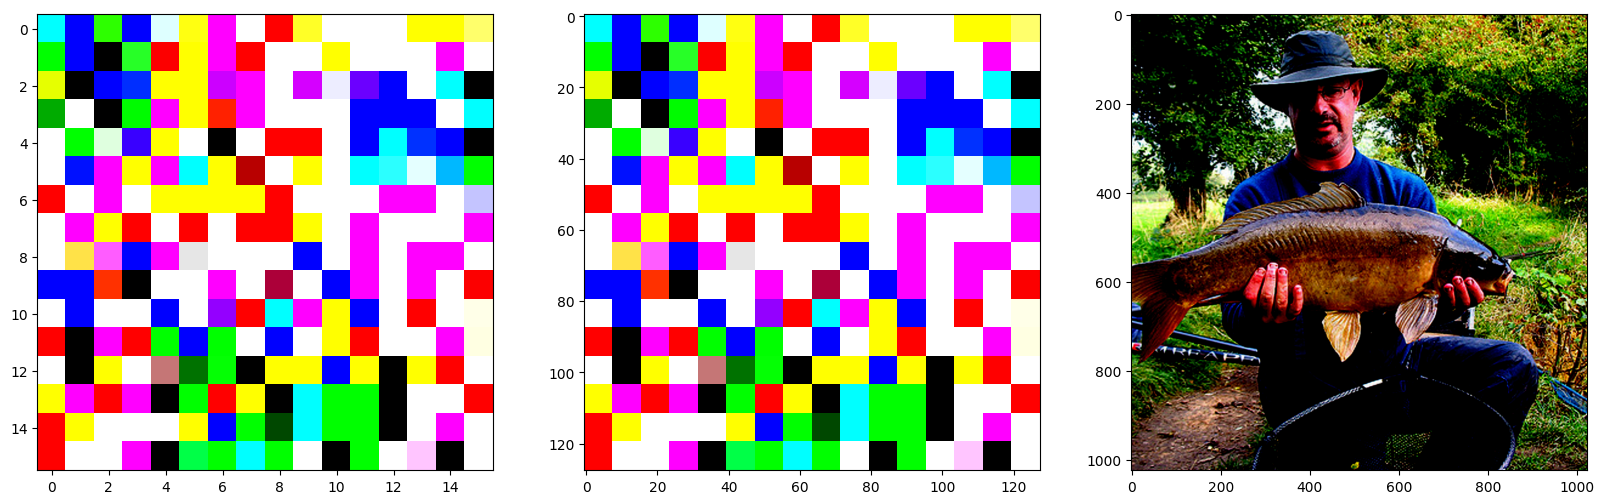

In [10]:

latent_s = torch.load("imagenet_0_latent_diffusers.pt").cpu().to(dtype=torch.float32)
image = load_image("datasets/imagenet/train/n01440764/n01440764_18.JPEG", 1024)

upscale_factor = 2 ** (4-1)
latent_up = F.interpolate(latent_s, mode="nearest", scale_factor=upscale_factor)

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(latent_s[0].permute(1, 2, 0))
ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(latent_up[0].permute(1, 2, 0))
ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(image.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[  9.1309,   1.9235,   5.4439,   4.1131],
         [  9.9386,  -0.5289,   0.0386,   0.4835],
         [  6.0913,   4.7717,  -5.1914,  -2.9962],
         [  6.5149,   1.5101,   0.8515,   1.0062]],

        [[ -4.8187,   1.1758, -14.7129,  -6.6349],
         [  5.0665,  -4.4639, -12.1527, -10.8073],
         [  3.9503,  -1.1568, -12.9454, -11.7660],
         [ -1.9325,  -8.5583,  -7.3354,  -7.0595]],

        [[ -7.4167, -10.3773,  -1.6760,  -1.5184],
         [ -9.4122,  -8.3723,  -9.7871,  -1.0540],
         [  4.6597,   5.0920,  -0.8267,  -1.8863],
         [ -3.4049,  -3.4944,  -0.6672,  -1.0145]],

        [[  3.3311,  -5.6146,  -1.6910,  -2.5864],
         [  0.3851,  -2.7097,   3.2615,  -6.8771],
         [  1.2715,   7.3597,  -1.3568,  -1.8326],
         [ -0.8261,   1.8506,  -2.3016,  -2.5203]]])

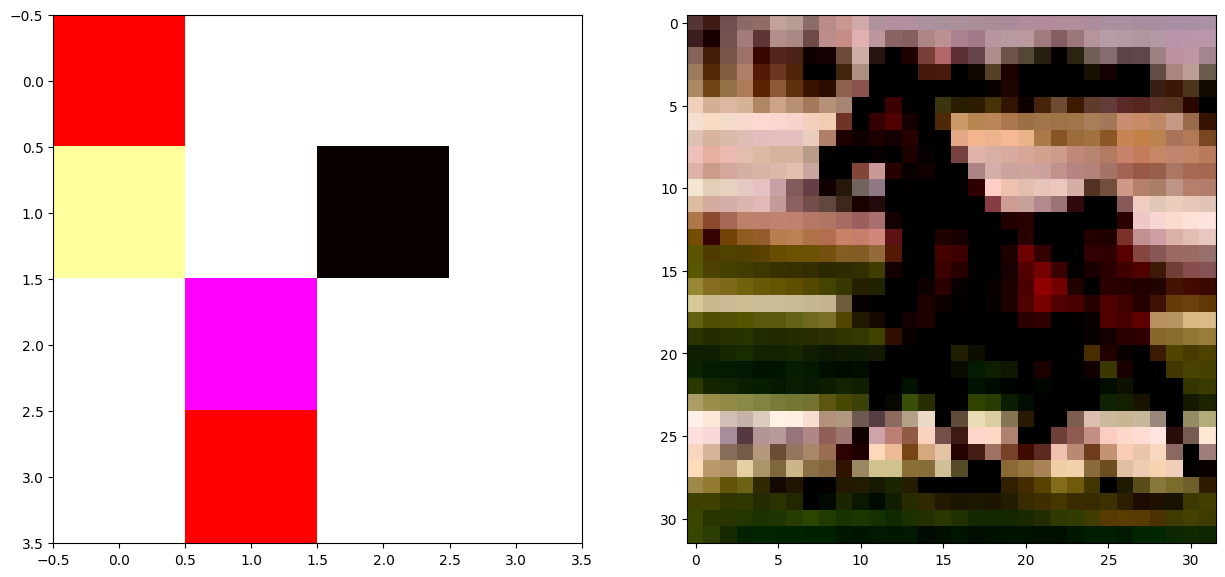

In [6]:
# Load Cifar-10 32x32 latent tensor
latent  = torch.load("datasets/cifar10-latents/cifar10-latents.pt")[3].cpu()
image  = torch.load("datasets/cifar10-latents/cifar10-imgs.pt")[3].cpu()

fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(latent.permute(1, 2, 0))
ax2 = fig.add_subplot(1,2,2)
plt.imshow(image.permute(1, 2, 0))
latent